<a href="https://colab.research.google.com/github/anabelcarol/PythonData-Analysis/blob/master/PyTorch_Keras/Keras_Syntax_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# 
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'fastai-v3/'

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/DeepLearning_TensorFlow/TensorFlow_FILES/DATA/fake_reg.csv') 

In [0]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


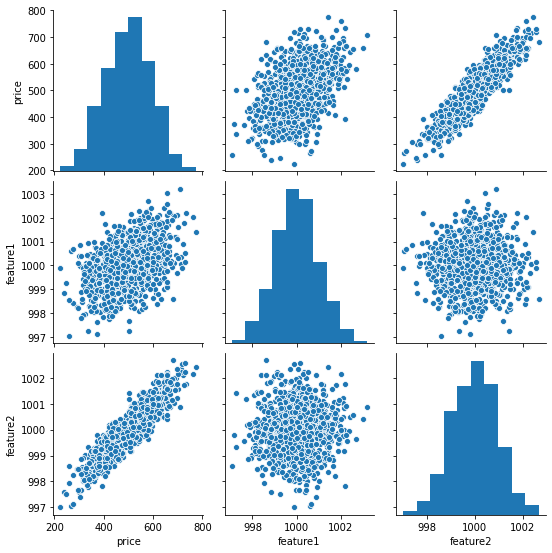

In [0]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
X_train.shape

(700, 2)

In [0]:
X_test.shape

(300, 2)

In [0]:
y_train.shape

(700,)

In [0]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
# help(MinMaxScaler)

In [0]:
scaler = MinMaxScaler()

In [0]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [0]:
scaler.fit(X_train) # fit does calculations of std and mean of data

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_train.max()

1.0

In [0]:
X_train.min()

0.0

In [0]:
X_test = scaler.transform(X_test) # fitting the X_test will be cheating

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense

In [0]:
import tensorflow as tf

In [0]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model does

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [0]:
model = Sequential([
    Dense(units=4, activation='relu'),
    Dense(units=2, activation = 'relu'),
    Dense(units=1)
])

In [0]:
# units = number of neurons per layer
# activation = string col sigmoid/..

### Model - adding in layers one by one

Let's go ahead and build a simple model and then compile it by defining our solver

In [0]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
# last layer a single neuron: predicting the price, then compared qith the true price
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

# optimizer = example ADAM
# loss = string that change based on the objective
# for multi-class classification problem
# model.compile(  optimizer='rmsprop',
#                 loss = 'categorical_crossentropy',
#                 metrics = ['accuracy'])

# for binary classification problem
# model.compile(  optimizer='rmsprop',
#                 loss = 'binary_crossentropy',
#                 metrics = ['accuracy'])

# for mean-squared error regression problem
# model.compile(  optimizer='rmsprop',
#                 loss = 'mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [0]:
model.fit(X_train,y_train,epochs=250)
# epochs = 1 : we go trough the entire dataset one time
# epochs = 250 : model goes 250 times through data
# we can add EARLY STOPPING optimzed on some validation test
# callbacks
# verbose = higher number of details about the runnig script
# mse very high at the begining

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256476.2969
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256365.0312
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256241.0938
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256092.0156
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255920.1875
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255723.4531
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255499.8906
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255247.1562
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254963.7656
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254644.8438
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254292.2500
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [0]:
# model.history.history

In [0]:
loss_df = pd.DataFrame(model.history.history)

In [0]:
loss_df.head()

,loss
0,256476.296875
1,256365.031250
2,256241.093750
3,256092.015625
4,255920.187500


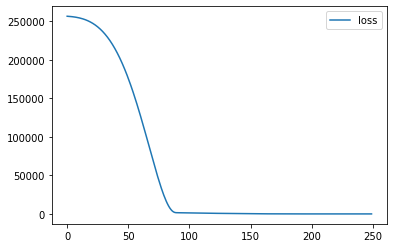

In [0]:
loss_df.plot()

In [0]:
# loss = model.history.history['loss']

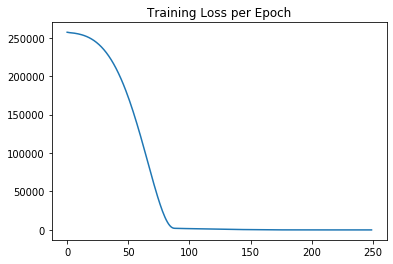

In [0]:
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [0]:
test_score = model.evaluate(X_test,y_test,verbose=0); test_score

25.1223201751709

In [0]:
# returns the mean scquare error of 25.12 on the test set

In [0]:
training_score = model.evaluate(X_train,y_train,verbose=0)
training_score

23.728424072265625

In [0]:
# returns the mean scquare error of 25.12 on the training set

In [0]:
# model.metrics_names

['loss']

In [0]:
# training_score

24.55682439531599

In [0]:
# test_score

26.798187001546225

### Further Evaluations

In [0]:
# Predictions of prices

In [0]:
test_predictions = model.predict(X_test)

In [0]:
test_predictions.shape

(300, 1)

In [0]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [0]:
test_predictions.shape

(300,)

In [0]:
# True value of Prices

In [0]:
pred_df = pd.DataFrame(y_test,columns=['Test_true_Y'])

In [0]:
pred_df.shape

(300, 1)

In [0]:
# Concatenate True VALUES with PREDCITIONS

In [0]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [0]:
pred_df.columns = ['Test_True_Y','Model Predictions']

In [0]:
pred_df

,Test_True_Y,Model Predictions
0,402.296319,405.530182
1,624.156198,623.974243
2,582.455066,592.548828
3,578.588606,572.591431
4,371.224104,366.777283
...,...,...
295,525.704657,529.375305
296,502.909473,515.595703
297,612.727910,610.078979
298,417.569725,417.227173


Let's compare to the real test labels!

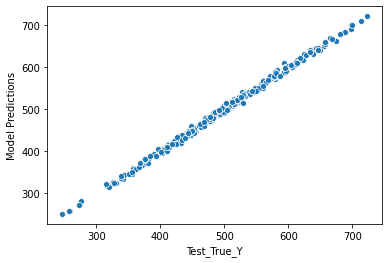

In [0]:
sns.scatterplot(data=pred_df, x='Test_True_Y',y='Model Predictions')

In [0]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

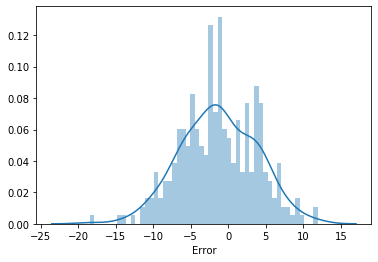

In [0]:
sns.distplot(pred_df['Error'],bins=50)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [0]:
mean_absolute_error(pred_df['Test_True_Y'],pred_df['Model Predictions'])

4.02089818466277

In [0]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


Comments: This means, On avg, I am 4 dollars off from my Price. 
4 is 10% of 498 mean

In [0]:
mean_squared_error(pred_df['Test_True_Y'],pred_df['Model Predictions'])

25.122324941374504

In [0]:
# ROOT MEAN SQUARED ERROR

In [0]:
mean_squared_error(pred_df['Test_True_Y'],pred_df['Model Predictions'])**0.5

5.0122175672425175

In [0]:
# Essentially the same thing, difference just due to precision
test_score

26.798187001546225

In [0]:
#RMSE
test_score**0.5

5.176696533654085

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [0]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [0]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [0]:
new_gem = scaler.transform(new_gem)

In [0]:
model.predict(new_gem)

array([[419.8977]], dtype=float32)

## Saving and Loading a Model

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('my_gem_model.h5')  # creates a HDF5 file 'my_model.h5'

In [0]:
later_model = load_model('my_gem_model.h5')

In [0]:
later_model.predict(new_gem)

array([[419.8977]], dtype=float32)